## Imports

In [27]:
# Python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Torch
import torch

# PhotonTorch
import photontorch as pt

# Progress Bars
from tqdm.notebook import tqdm
from tqdm.notebook import trange

# save the record
import inspect

# avoid truncation in print
import sys
np.set_printoptions(threshold=1000)
np.set_printoptions(edgeitems=3)



###################### disactivate print => debug = False ############ activate print => debug = True #################################à
debug = False

# Data

## Data parameters & settings

In [28]:
data_size = 10000
test_data_size = 50
limit = {"high":1,"low":0}
generator = np.random.default_rng()
classes = {"class1":[1,0,0,0], "class2":[0,1,0,0], "class3": [0,0,1,0], "class4": [0,0,0,1] }
################## randomize mean and std_deviation for each class ################
# mean = {"mean1":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean2":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean3":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean4":[np.random.random(),np.random.random(),np.random.random(),np.random.random()],}
# std_deviation = {"std_deviation1":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation2":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation3":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation4":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], }

mean = {"mean1":[0.2, 0.8, 0.3, 0.7], 
        "mean2":[0.4, 0.2, 0.9, 0.3], 
        "mean3":[0.3, 0.4, 0.1, 0.6], 
        "mean4":[0.5, 0.6, 0.7, 0.4]}
std_deviation = {"std_deviation1": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation2": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation3": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation4": [0.05, 0.05, 0.05, 0.05] }


## Generation the data set

In [29]:
# class_to_generate = np.random.randint(1,5)
# print([generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),])
# print(class_to_generate)
# print([[mean.get("mean{}".format(class_to_generate))[0], std_deviation.get("std_deviation{}".format(class_to_generate))[0]],
#        [mean.get("mean{}".format(class_to_generate))[1], std_deviation.get("std_deviation{}".format(class_to_generate))[1]],
#        [mean.get("mean{}".format(class_to_generate))[2], std_deviation.get("std_deviation{}".format(class_to_generate))[2]],
#        [mean.get("mean{}".format(class_to_generate))[3], std_deviation.get("std_deviation{}".format(class_to_generate))[3]]]),
# print(classes.get("class{}".format(class_to_generate)))

In [30]:
# the final structure of the data should be somenthing like
#       [[[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                              
#  N     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#  |     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#  T                                  .                                           
#  I                                  .                                           
#  M                                  .                                           
#  E                                  .                                           
#  S     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#        [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                       
#        [[input1,input2,input3,input4],[output1,output2,output3,output4]]]   

############################################ training data ########################################################################################àà
data = np.empty((data_size,2,4)) #2 and 4 to create a couple of input-output array. the array are composed of 4 values

for i in range(data_size):
    class_to_generate = np.random.randint(1,5)
    data[i][0] = [generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),]
    data[i][1] = classes.get("class{}".format(class_to_generate))
#make sure that all the data are between [0,1]
data = data.clip(0,1)

if(debug):
    print(mean)
    print(std_deviation) 
    print(data)    

############################################ test data ########################################################################################àà
test = np.empty((test_data_size,2,4))
for i in range(test_data_size):
    class_to_generate = np.random.randint(1,5)
    test[i][0] = [generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),]
    test[i][1] = classes.get("class{}".format(class_to_generate))
#make sure that all the data are between [0,1]
test = test.clip(0,1)

if(debug):
    print(mean)
    print(std_deviation) 
    print(test)

with np.printoptions(threshold=np.inf):
    with open("test_file_fpga.txt","w") as file:
        file.write("{}".format(test))
    with open("data_file_fpga.txt","w") as file:
        file.write("{}".format(data))



## Data visualization

### Plot data for traning

In [31]:
import plotly as px
#preapare data
x=data[:, 0, 0]
y=data[:, 0, 1]
z=data[:, 0, 2]
color=data[:, 0, 3]
symbol = []
for i in data[:,1]:
    symbol.append(str(torch.argmax(torch.tensor(i, dtype=torch.float32)).item()+1))
symbol = ["square" if item == "1" else item for item in symbol]
symbol = ["circle" if item == "2" else item for item in symbol]
symbol = ["diamond" if item == "3" else item for item in symbol]
symbol = ["cross" if item == "4" else item for item in symbol]

#prepare plot
fig1 = px.graph_objs.Scatter3d(x=x, y=y, z=z, marker=dict(color=color, symbol=symbol, opacity=0.9), line=dict(width=0.02), mode='markers')

mylayout = px.graph_objs.Layout(scene=dict(xaxis=dict( title="value 1"), yaxis=dict( title="value 2"), zaxis=dict(title="value 3")))


#Plot and save html
px.offline.plot({"data": [fig1], "layout": mylayout}, auto_open=True, filename=("data_training.html"))

'data_training.html'

### Plot training scattering matrix

In [32]:
import plotly.express as px
#preapare data
scattering_matrix_data = []
for i in data[:]:
    scattering_matrix_data.append([i[0][0],i[0][1],i[0][2],i[0][3],str(torch.argmax(torch.tensor(i[1], dtype=torch.float32)).item()+1)])

#plot
fig = px.scatter_matrix(scattering_matrix_data, dimensions=[0, 1, 2, 3], color=4)
fig.update_traces(diagonal_visible=False)
fig.show()

### Plot data for testing

In [33]:
import plotly as px
#preapare data
x=test[:, 0, 0]
y=test[:, 0, 1]
z=test[:, 0, 2]
color=test[:, 0, 3]
symbol = []
for i in test[:,1]:
    symbol.append(str(torch.argmax(torch.tensor(i, dtype=torch.float32)).item()+1))
symbol = ["square" if item == "1" else item for item in symbol]
symbol = ["circle" if item == "2" else item for item in symbol]
symbol = ["diamond" if item == "3" else item for item in symbol]
symbol = ["cross" if item == "4" else item for item in symbol]

#prepare plot
fig1 = px.graph_objs.Scatter3d(x=x, y=y, z=z, marker=dict(color=color, symbol=symbol, opacity=0.9), line=dict(width=0.02), mode='markers')

mylayout = px.graph_objs.Layout(scene=dict(xaxis=dict( title="value 1"), yaxis=dict( title="value 2"), zaxis=dict(title="value 3")))


#Plot and save html
px.offline.plot({"data": [fig1], "layout": mylayout}, auto_open=True, filename=("data_test.html"))

'data_test.html'

### Plot test scattering matrix

In [34]:
import plotly.express as px
#preapare data
scattering_matrix_data = []
for i in test[:]:
    scattering_matrix_data.append([i[0][0],i[0][1],i[0][2],i[0][3],str(torch.argmax(torch.tensor(i[1], dtype=torch.float32)).item()+1)])

#plot
fig = px.scatter_matrix(scattering_matrix_data, dimensions=[0, 1, 2, 3], color=4)
fig.update_traces(diagonal_visible=False)
fig.show()

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.linear1 = nn.Linear(4,4,dtype=torch.float32,bias=False)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(4,4,dtype=torch.float32,bias=False)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x
    
net = Net()
print(net)

Net(
  (linear1): Linear(in_features=4, out_features=4, bias=False)
  (activation1): ReLU()
  (linear2): Linear(in_features=4, out_features=4, bias=False)
  (activation2): ReLU()
)


In [36]:
print(net.parameters)

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=4, out_features=4, bias=False)
  (activation1): ReLU()
  (linear2): Linear(in_features=4, out_features=4, bias=False)
  (activation2): ReLU()
)>


In [37]:

# learning_rate = 0.8

# loss_fn = nn.MSELoss()

# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# for i in range(5):
#     for epoch in range(data_size):

#         input = torch.tensor(data[epoch][0],dtype=torch.float32)
#         target = torch.tensor(data[epoch][1],dtype=torch.float32)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         pred = net(input)
#         loss = loss_fn(pred, target)
#         loss.backward()
#         optimizer.step()

# print("Training 3 Complete")

# learning_rate = 0.5

# loss_fn = nn.MSELoss()

# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# for i in range(5):
#     for epoch in range(data_size):

#         input = torch.tensor(data[epoch][0],dtype=torch.float32)
#         target = torch.tensor(data[epoch][1],dtype=torch.float32)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         pred = net(input)
#         loss = loss_fn(pred, target)
#         loss.backward()
#         optimizer.step()

# print("Training -1 Complete")
learning_rate = 0.2

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for i in range(5):
    for epoch in range(data_size):

        input = torch.tensor(data[epoch][0],dtype=torch.float32)
        target = torch.tensor(data[epoch][1],dtype=torch.float32)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(input)
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()

print("Training 0 Complete")


learning_rate = 0.1

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for i in range(5):
    for epoch in range(data_size):

        input = torch.tensor(data[epoch][0],dtype=torch.float32)
        target = torch.tensor(data[epoch][1],dtype=torch.float32)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(input)
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()

print("Training 1 Complete")

learning_rate = 0.05

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for i in range(5):
    for epoch in range(data_size):

        input = torch.tensor(data[epoch][0],dtype=torch.float32)
        target = torch.tensor(data[epoch][1],dtype=torch.float32)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(input)
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()

print("Training 2 Complete")

learning_rate = 0.02

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for i in range(5):
    for epoch in range(data_size):

        input = torch.tensor(data[epoch][0],dtype=torch.float32)
        target = torch.tensor(data[epoch][1],dtype=torch.float32)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(input)
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()

print("Training 3 Complete")

learning_rate = 0.01

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for i in range(5):
    for epoch in range(data_size):

        input = torch.tensor(data[epoch][0],dtype=torch.float32)
        target = torch.tensor(data[epoch][1],dtype=torch.float32)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(input)
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()

print("Training 4 Complete")

"""
Training Complete
"""

Training 0 Complete
Training 1 Complete
Training 2 Complete
Training 3 Complete
Training 4 Complete


'\nTraining Complete\n'

In [38]:

# learning_rate = 1

# loss_fn = nn.MSELoss()

# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# for i in range(5):
#     for epoch in range(data_size):

#         input = torch.tensor(data[epoch][0],dtype=torch.float32)
#         target = torch.tensor(data[epoch][1],dtype=torch.float32)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         pred = net(input)
#         loss = loss_fn(pred, target)
#         loss.backward()
#         optimizer.step()

# print("Training 3 Complete")

# # learning_rate = 0.01

# # loss_fn = nn.MSELoss()

# # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# # for i in range(5):
# #     for epoch in range(data_size):

# #         input = torch.tensor(data[epoch][0],dtype=torch.float32)
# #         target = torch.tensor(data[epoch][1],dtype=torch.float32)

# #         # zero the parameter gradients
# #         optimizer.zero_grad()

# #         # forward + backward + optimize
# #         pred = net(input)
# #         loss = loss_fn(pred, target)
# #         loss.backward()
# #         optimizer.step()

# # print("Training 4 Complete")

# # learning_rate = 0.005

# # loss_fn = nn.MSELoss()

# # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# # for i in range(5):
# #     for epoch in range(data_size):

# #         input = torch.tensor(data[epoch][0],dtype=torch.float32)
# #         target = torch.tensor(data[epoch][1],dtype=torch.float32)

# #         # zero the parameter gradients
# #         optimizer.zero_grad()

# #         # forward + backward + optimize
# #         pred = net(input)
# #         loss = loss_fn(pred, target)
# #         loss.backward()
# #         optimizer.step()

# # print("Training 5 Complete")


tensor([0.0000, 0.0000, 0.0000, 1.0842], grad_fn=<ReluBackward0>) tensor([0., 0., 0., 1.]) 3 

tensor([0., 0., 0., 0.], grad_fn=<ReluBackward0>) tensor([1., 0., 0., 0.]) 0 

tensor([0., 0., 0., 0.], grad_fn=<ReluBackward0>) tensor([1., 0., 0., 0.]) 0 

tensor([0.0000, 0.0000, 1.0615, 0.0000], grad_fn=<ReluBackward0>) tensor([0., 0., 1., 0.]) 2 

tensor([0., 0., 0., 0.], grad_fn=<ReluBackward0>) tensor([1., 0., 0., 0.]) 0 

tensor([0.0000, 0.0000, 0.9255, 0.0000], grad_fn=<ReluBackward0>) tensor([0., 0., 1., 0.]) 2 

tensor([0.0000, 0.0000, 1.1534, 0.0000], grad_fn=<ReluBackward0>) tensor([0., 0., 1., 0.]) 2 

tensor([0., 0., 0., 0.], grad_fn=<ReluBackward0>) tensor([1., 0., 0., 0.]) 0 

tensor([0.0000, 0.0000, 0.0000, 1.0233], grad_fn=<ReluBackward0>) tensor([0., 0., 0., 1.]) 3 

tensor([0.0000, 0.0000, 1.0824, 0.0000], grad_fn=<ReluBackward0>) tensor([0., 0., 1., 0.]) 2 

tensor([0.0000, 1.1243, 0.0000, 0.0085], grad_fn=<ReluBackward0>) tensor([0., 1., 0., 0.]) 1 

tensor([0., 0., 0.,

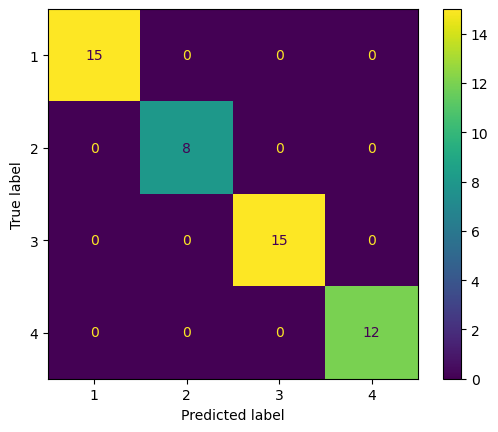

In [53]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
#preapare data
confusion_matrix_value = [] #format is [<real class>,<predicted class>]
for i in range(len(test)):
    input = torch.tensor(test[i][0],dtype=torch.float32)
    target = torch.tensor(test[i][1],dtype=torch.float32)
    
    pred = net(input)
    loss = loss_fn(pred, target)
    print(pred,target,torch.argmax((pred)).item(),"\n")

    confusion_matrix_value.append([(torch.argmax(target)).item()+1,torch.argmax((pred)).item()+1])
    # print(confusion_matrix_value[-1])
#plot
confusion_matrix_value = np.array(confusion_matrix_value)

confusion_matrix_graph = ConfusionMatrixDisplay.from_predictions(confusion_matrix_value[:,0].tolist(), confusion_matrix_value[:,1].tolist(), labels=[1, 2, 3, 4])


In [47]:
print(net.linear1.weight.data.tolist())
print(net.linear2.weight.data.tolist())
print(list(net.linear1.weight.data))
print(list(net.linear2.weight.data))

# [tensor([ 0.5732,  2.6320, -1.3110,  0.7168]), tensor([-1.3094,  1.5997,  2.8405, -1.5428]), tensor([ 0.1820, -0.3719,  0.0070, -0.2569]), tensor([ 0.1742,  0.0124, -1.7117,  2.1902])]
# [tensor([-0.0795, -0.2170, -0.2566, -0.2416]), tensor([-1.0638,  0.5124, -0.0982, -0.3978]), tensor([ 0.3675, -3.7978, -0.0420,  0.3666]), tensor([ 0.7922,  0.0039,  0.3375, -2.6363])]


[[0.5732338428497314, 2.632009506225586, -1.3109984397888184, 0.7168338298797607], [-1.3094229698181152, 1.599686622619629, 2.840545892715454, -1.5428022146224976], [0.18196144700050354, -0.3718804717063904, 0.006967947352677584, -0.2568860948085785], [0.1741815060377121, 0.012425840832293034, -1.7117431163787842, 2.1902029514312744]]
[[-0.07949608564376831, -0.2169877290725708, -0.25664108991622925, -0.24164295196533203], [-1.0638420581817627, 0.5123502016067505, -0.0982406735420227, -0.39777252078056335], [0.36746445298194885, -3.7977561950683594, -0.041951872408390045, 0.3665708303451538], [0.7922273874282837, 0.0038785734213888645, 0.3374517560005188, -2.636317729949951]]
[tensor([ 0.5732,  2.6320, -1.3110,  0.7168]), tensor([-1.3094,  1.5997,  2.8405, -1.5428]), tensor([ 0.1820, -0.3719,  0.0070, -0.2569]), tensor([ 0.1742,  0.0124, -1.7117,  2.1902])]
[tensor([-0.0795, -0.2170, -0.2566, -0.2416]), tensor([-1.0638,  0.5124, -0.0982, -0.3978]), tensor([ 0.3675, -3.7978, -0.0420,  0

In [51]:
import struct
def binary(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))
layer1 = [[0.5732338428497314, 2.632009506225586, -1.3109984397888184, 0.7168338298797607], [-1.3094229698181152, 1.599686622619629, 2.840545892715454, -1.5428022146224976], [0.18196144700050354, -0.3718804717063904, 0.006967947352677584, -0.2568860948085785], [0.1741815060377121, 0.012425840832293034, -1.7117431163787842, 2.1902029514312744]]
layer2 = [[-0.07949608564376831, -0.2169877290725708, -0.25664108991622925, -0.24164295196533203], [-1.0638420581817627, 0.5123502016067505, -0.0982406735420227, -0.39777252078056335], [0.36746445298194885, -3.7977561950683594, -0.041951872408390045, 0.3665708303451538], [0.7922273874282837, 0.0038785734213888645, 0.3374517560005188, -2.636317729949951]]

j = 0
print("layer1")
for weights in layer1:
    print("weight:",j)
    j = j+1
    for i in weights:
        print(binary(i))
j = 0
print("layer2")
for weights in layer2:
    print("weight:",j)
    j = j+1
    for i in weights:
        print(binary(i))


# [tensor([ 1.4921, -1.6077,  1.2564, -1.4146]), tensor([-0.1326, -0.4071,  0.2426, -0.0282]), tensor([-0.0386, -0.3448,  0.0094, -0.3586]), tensor([-0.3653, -0.1628, -0.4158,  0.1303])]
# [tensor([-6.2369e+00,  5.7487e-02, -3.1142e-03, -4.4716e-01]), tensor([ 1.2034, -0.4640,  0.0512, -0.2286]), tensor([-0.2400, -0.0720, -0.0044,  0.2268]), tensor([ 0.1768,  0.4988, -0.3190, -0.0931])]716e-01]), tensor([ 1.2034, -0.4640,  0.0512, -0.2286]), tensor([-0.2400, -0.0720, -0.0044,  0.2268]), tensor([ 0.1768,  0.4988, -0.3190, -0.0931])]

layer1
weight: 0
00111111000100101011111101110100
01000000001010000111001011011000
10111111101001111100111011001100
00111111001101111000001001101100
weight: 1
10111111101001111001101100101100
00111111110011001100001010001000
01000000001101011100101110000001
10111111110001010111101010001011
weight: 2
00111110001110100101010000011010
10111110101111100110011100011110
00111011111001000101001101100001
10111110100000111000011010010011
weight: 3
00111110001100100101110010100011
00111100010010111001010111000001
10111111110110110001101001100110
01000000000011000010110001001001
layer2
weight: 0
10111101101000101100111011011000
10111110010111100011001000001000
10111110100000110110011001110110
10111110011101110111000101000000
weight: 1
10111111100010000010101111111010
00111111000000110010100101100010
10111101110010010011001001101000
10111110110010111010100011010111
weight: 2
00111110101111000010010001001101
11000000011100110000111001110000
10111101001010111101010110111010
0011111010111011101011110